<div>
<img src="upgrad.jpg" width="200" height="150" align="right"/>
</div>

# Lending case study 

The data contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Read Loan CSV Data

In [3]:
file_path = 'loan.csv'
data = pd.read_csv(file_path,low_memory=False)

In [4]:
#To store various plots using save fig
#plot_path = '/Users/Z0040FD/Downloads/Casestudy_plot'

### Quick Data overview

In [5]:
#Display initial few rows
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Find out various data types of the columns
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
#Descriptipve analysis
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### To find out missing values if any

In [8]:
missing_per = data.isnull().sum() * 100 / len(data)
miss_val_col = missing_per[missing_per > 30].index #Beyond 30% missing data

print('Columns consisting of more than 30% missing data : \n \n',miss_val_col)

Columns consisting of more than 30% missing data : 
 
 Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_

In [9]:
#Find out columns having more than 30% missing values and remove such columns for analysis
print('Total Number of columns to be removed are ', len(miss_val_col))

Total Number of columns to be removed are  58


**Inference :** 
We have about 58 variables containing more than 30% missing values. Such variables would not add any value to our analysis. Given that it depicts zero or low variance, hence getting rid of such columns 

Also, most of these NAs are due to the records containing rejected loans which is out of scope for this analysis

### Drop missing values column

In [10]:
print('Number of rows and columns before removing missing data columns', data.shape)

data.drop(miss_val_col.to_list(), axis = 1, inplace = True)

print('Number of rows and columns after removing missing data columns', data.shape)


Number of rows and columns before removing missing data columns (39717, 111)
Number of rows and columns after removing missing data columns (39717, 53)


### Find out variables having close to zero variance
* Variables with close to zero variance shows absolutely no contribution in defining the causation of any particular metric from the dataset, hence reducing the shape of dataframe

In [11]:
var_col = data.var(numeric_only=True) 
low_var_ol = var_col[var_col<1].index
print('Below are the columns having close to 0 variance : \n \n ',low_var_ol)

Below are the columns having close to 0 variance : 
 
  Index(['delinq_2yrs', 'pub_rec', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


### Drop lower variance numeric columns

In [12]:
print('Number of rows and columns before removing lower variance variables', data.shape)

data.drop(low_var_ol.to_list(), axis = 1, inplace = True)

print('Number of rows and columns after removing lower variance variables', data.shape)

Number of rows and columns before removing lower variance variables (39717, 53)
Number of rows and columns after removing lower variance variables (39717, 44)


### Data cleaning

* Check for data conversion if required
* Check for duplicates
* Check for string manipulation if required

In [13]:
#duplicate check
print('Total duplicate rows are ', data.duplicated().sum())

Total duplicate rows are  0


In [14]:
#Clean employment length column
data.emp_length.fillna('0',inplace=True)

#get numerical value from 
data['emp_length_n']=data.emp_length.str.extract('(\d+)') #regex
data[['emp_length','emp_length_n']].head(3)

,emp_length,emp_length_n
0,10+ years,10
1,< 1 year,1
2,10+ years,10


In [15]:
#Derive numerical based interest rate and revol utilisation column
data['int_rate_n'] = data['int_rate'].str.rstrip('%')
data['revol_util_n'] = data['revol_util'].str.rstrip('%')

In [16]:
#Typecast numerical data
num_col = ['loan_amnt','installment','annual_inc','dti','emp_length_n','total_pymnt','funded_amnt'
           ,'int_rate_n','funded_amnt_inv']
data[num_col] = data[num_col].apply(pd.to_numeric)


**Final analysis column and rows**

In [17]:
print('Final number of rows for analysis - ',data.shape[0])
print('Final number of columns for analysis - ',data.shape[1])

Final number of rows for analysis -  39717
Final number of columns for analysis -  47


## Univariate Analysis

* To check the spread of potential value add numeric variables
* Do a frequency check of potential value add category variables

Important variable:
1. Loan_Amnt
2. Total Payment
3. Annual Income

**Loan Amount**

Spread of metric loan_amnt 

  count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


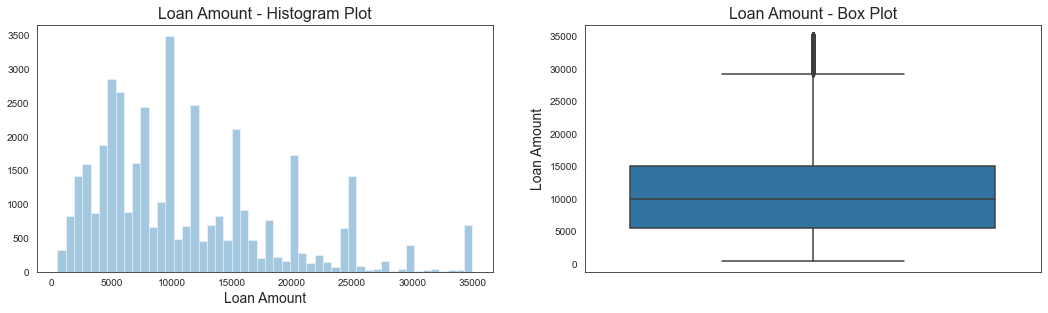

In [18]:
print('Spread of metric loan_amnt \n\n ',data['loan_amnt'].describe())


plt.figure(figsize=(18,10))
sns.set_style("white")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['loan_amnt'],rug = False, kde=False)
ax.set_title('Loan Amount - Histogram Plot',fontsize=16)
ax.set_xlabel('Loan Amount',fontsize=14)

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16)
ax.set_ylabel('Loan Amount',fontsize=14)
plt.show()

# plt.savefig('plot_path' + 'loan_amnt_univariate.png', bbox_inches='tight')

**Inference:** Right skewed variable, Loan Amount - Most of loans are given between 5000 - 15000 Rs

**Annual Income**

Spread of metric annual income 

  count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


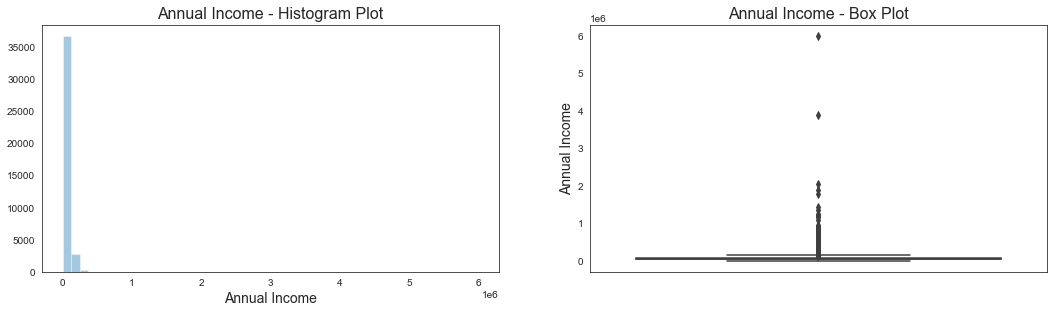

In [19]:
print('Spread of metric annual income \n\n ',data['annual_inc'].describe())

plt.figure(figsize=(18,10))
sns.set_style("white")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['annual_inc'],rug = False, kde=False)
ax.set_title('Annual Income - Histogram Plot',fontsize=16)
ax.set_xlabel('Annual Income',fontsize=14)

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16)
ax.set_ylabel('Annual Income',fontsize=14)
plt.show()

**Inference:** Highly influenced by outliers and needs treatment

**Total Payment**

Spread of metric Total Payment 

  count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64


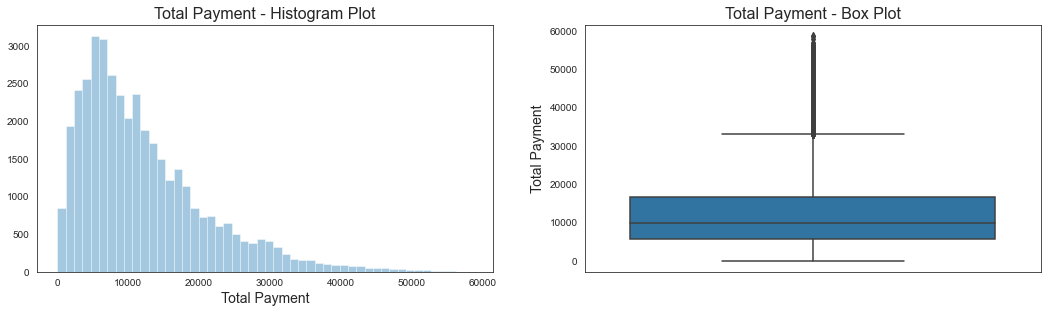

In [20]:
print('Spread of metric Total Payment \n\n ',data['total_pymnt'].describe())

plt.figure(figsize=(18,10))
sns.set_style("white")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['total_pymnt'],rug = False, kde=False)
ax.set_title('Total Payment - Histogram Plot',fontsize=16)
ax.set_xlabel('Total Payment',fontsize=14)

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['total_pymnt'])
ax.set_title('Total Payment - Box Plot',fontsize=16)
ax.set_ylabel('Total Payment',fontsize=14)
plt.show()

**Inference:** 
* Right skewed variable, Total Payment. 
* Most of the payments are made between the range of 5500 to 16500 Rs

## Category Unnivariate Analysis

**Loan Purpose**

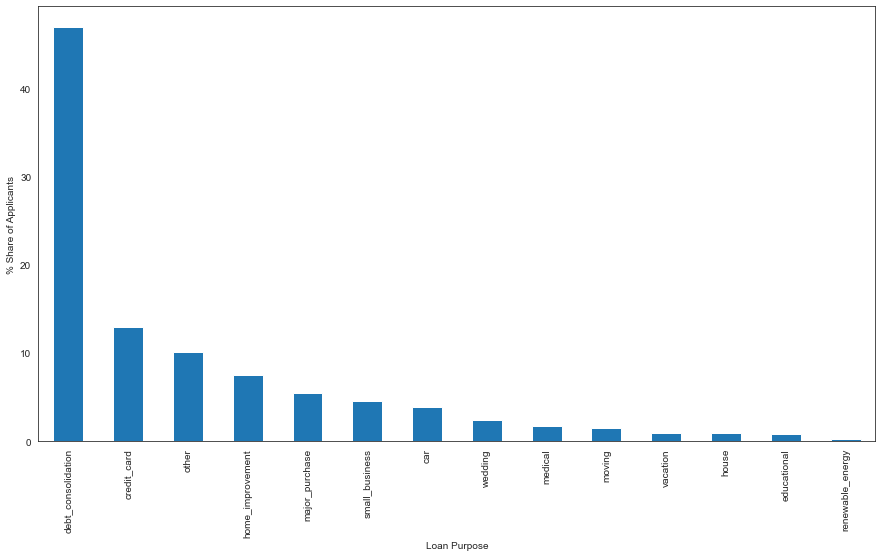

In [21]:
#To check the balance of purpose w.r.t total data in %
plt.figure(figsize=(15,8))
round((data.purpose.value_counts())/len(data)*100,2).plot.bar()
plt.ylabel('% Share of Applicants')
plt.xlabel('Loan Purpose')
plt.show()

**Inference** : debt_consolidation and credit card loan have highest share of loan

In [22]:
round((data.loan_status.value_counts())/len(data)*100,2)

Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64

**Loan Status**

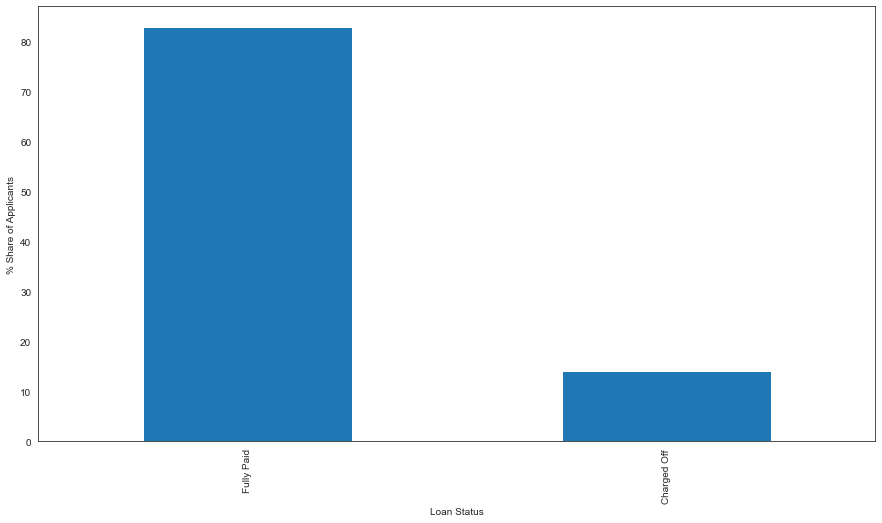

In [23]:
#To check the balance of loan status w.r.t total data in %
plt.figure(figsize=(15,8))
round((data[data['loan_status']!='Current'].loan_status.value_counts())/len(data)*100,2).plot.bar()
plt.ylabel('% Share of Applicants')
plt.xlabel('Loan Status')
plt.show()

**Inference** : 
* Fully Paid - 85.16%
* Charged Off - 14.84%

### Outlier Treatment - Annual Income

Number of rows before outlier treatment 39717
Number of rows after outlier treatment 38525
% of records lost due to outlier treatment 3.0 %


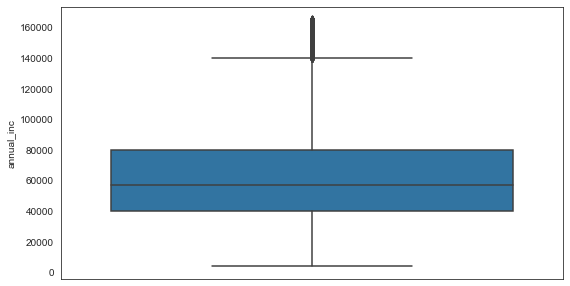

In [24]:
#Removing applicants with annual income values beyond 97% percentile
pre_outlier = data.shape[0]
print('Number of rows before outlier treatment',pre_outlier)

data = data[data["annual_inc"] < data["annual_inc"].quantile(0.97)]

post_outlier = data.shape[0]
print('Number of rows after outlier treatment',post_outlier)

print('% of records lost due to outlier treatment',round(((pre_outlier-post_outlier)/pre_outlier)*100,2),'%' )

plt.figure(figsize=(9,5))
sns.boxplot(y=data['annual_inc'])
plt.show()

**Inference** : 
* We did not choose to remove say 95% above data so that we could retain most of the records and here we lose only 3% of the records 
* Most of the applicatns have annual income between the range of 40000 to 80000 Rs

### Derived Metric

**Date time conversion**

In [25]:
# categorise some of numeric variable into buckets for clear analysis
data['loan_amnt_range'] = pd.cut(data['loan_amnt'], [0, 8000, 16000, 24000, 32000, 40000], labels=['0-8000', '8000-16000', '16000-24000', '24000-32000', '40000 +'])

data['annual_inc_range'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


**Converting Issue date and Last payment date to datetime**

In [26]:
print('Data type of Issue date', data['issue_d'].dtype)
print('Data type of Last Payment date', data['issue_d'].dtype)
data[['issue_d','last_pymnt_d']].head(2)

Data type of Issue date object
Data type of Last Payment date object


,issue_d,last_pymnt_d
0,Dec-11,Jan-15
1,Dec-11,Apr-13


**Derive Days, Month difference**

In [27]:
#Conversion
data['issue_d']= pd.to_datetime(data['issue_d'].str.upper(), format='%b-%y', yearfirst=False)
data['last_pymnt_d']= pd.to_datetime(data['last_pymnt_d'].str.upper(), format='%b-%y', yearfirst=False)

In [28]:
print('Data type of Issue date', data['issue_d'].dtype)
print('Data type of Last Payment date', data['issue_d'].dtype)
data[['issue_d','last_pymnt_d']].head(2)

Data type of Issue date datetime64[ns]
Data type of Last Payment date datetime64[ns]


,issue_d,last_pymnt_d
0,2011-12-01,2015-01-01
1,2011-12-01,2013-04-01


**Defaulters spread across days of loan**

In [29]:
data['loan_days']=(data['last_pymnt_d'] - data['issue_d']).dt.days

data['loan_year'] = (data['last_pymnt_d'].dt.year - data['issue_d'].dt.year)

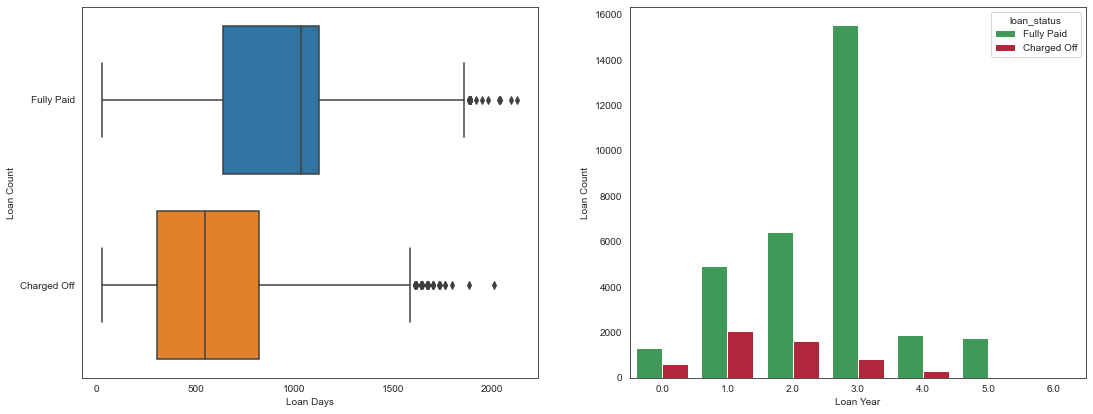

In [30]:
plt.figure(figsize=(18,15))
sns.set_style("white")


plt.subplot(2, 2, 1)
ax = sns.boxplot(x='loan_days', y='loan_status', data=data[data['loan_status']!='Current'])
ax.set_xlabel('Loan Days')
ax.set_ylabel('Loan Count')
# plt.show()


plt.subplot(2, 2, 2)
ax = sns.countplot(x='loan_year', data=data[data['loan_status']!='Current'], hue='loan_status', palette=['#32a852',"#c7102b"])
ax.set_xlabel('Loan Year')
ax.set_ylabel('Loan Count')
plt.show()

**Inference**:
* The applicants are more likely to default in the early stage of loan tenure

## Bivariate Analysis

* To check the impact of various variables on charged off metric

**Income Range**

In [31]:
inc_range_vs_loan_st = data.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan_st['charged_off_%'] = round(inc_range_vs_loan_st['Charged Off']/(inc_range_vs_loan_st['Charged Off']+inc_range_vs_loan_st['Current']+inc_range_vs_loan_st['Fully Paid'])*100,2)
inc_range_vs_loan_st.head()



loan_status,annual_inc_range,Charged Off,Current,Fully Paid,charged_off_%
0,0-20000,237,9,943,19.93
1,20000-40000,1514,170,7004,17.43
2,40000-60000,1729,345,9534,14.89
3,60000-80000,1024,240,6597,13.03
4,80000 +,1004,331,7844,10.94


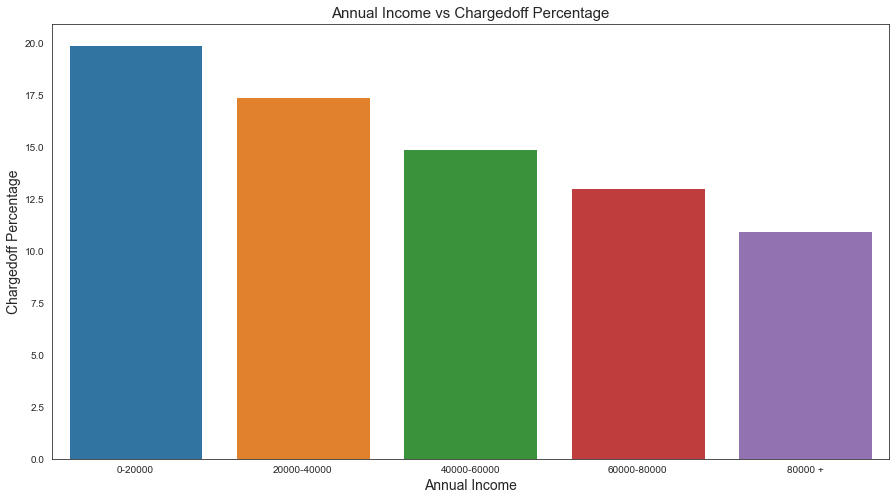

In [32]:
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Annual Income vs Chargedoff Percentage',fontsize=15)
ax1=sns.barplot(x='annual_inc_range', y='charged_off_%', data=inc_range_vs_loan_st)
ax1.set_ylabel('Chargedoff Percentage',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

**Inference**
* We see that with increase in annual income charged off ratio decreases.

**Work Experience (Employment Length)**

In [33]:
emp_len_vs_loan_st = data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_len_vs_loan_st['Total'] = emp_len_vs_loan_st['Charged Off'] + emp_len_vs_loan_st['Current'] + emp_len_vs_loan_st['Fully Paid'] 
emp_len_vs_loan_st['Charged_off_%'] = round((emp_len_vs_loan_st['Charged Off'] / emp_len_vs_loan_st['Total'])*100,2)
emp_len_vs_loan_st=emp_len_vs_loan_st.sort_values('Charged_off_%', ascending=False)


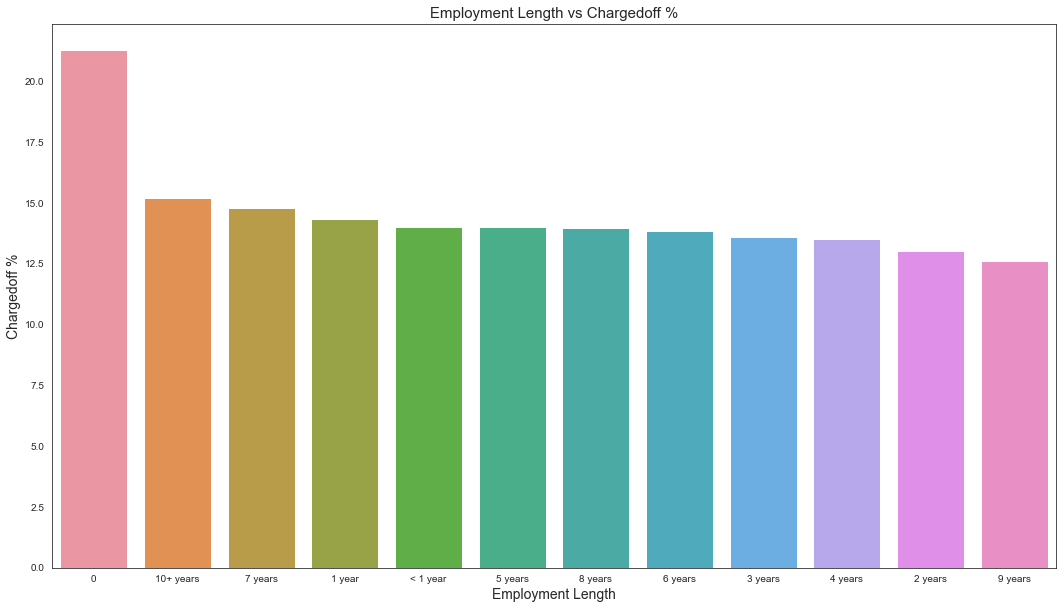

In [34]:
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.set_title('Employment Length vs Chargedoff %',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Charged_off_%', data=emp_len_vs_loan_st)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff %',fontsize=14)
plt.show()

**Inference**:

* Applicants working for less than 1 year of work experience have high chances of getting charged off.
* Remaining applicants show a similar pattern of getting charged off

**Purpose of Loan**

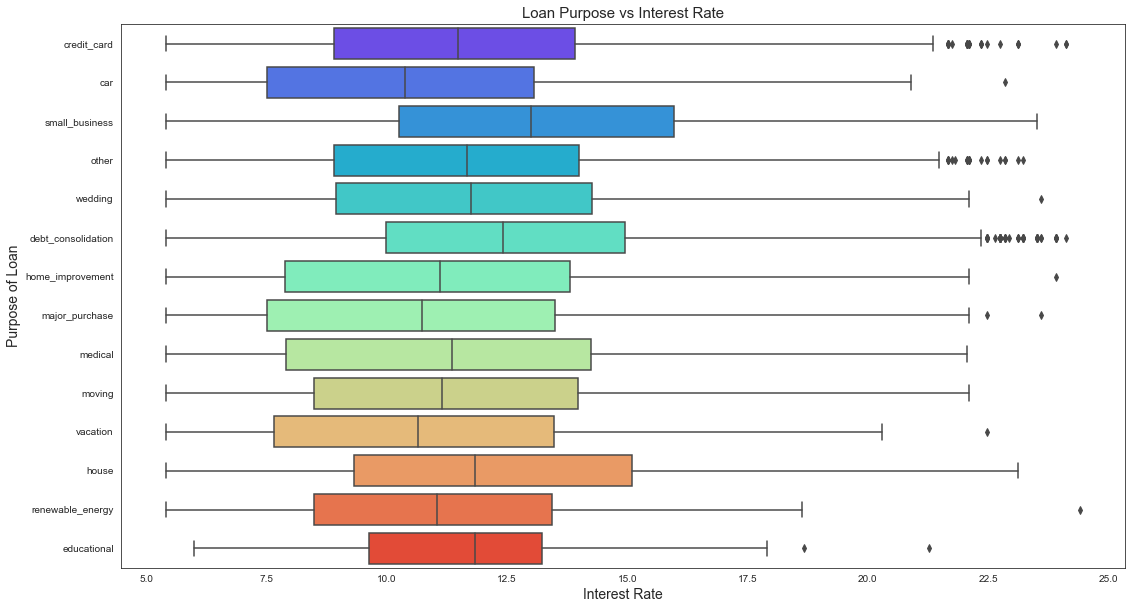

In [35]:
plt.figure(figsize=(18,10))
ax = sns.boxplot(x='int_rate_n', y='purpose', data =data,palette='rainbow')
ax.set_title('Loan Purpose vs Interest Rate',fontsize=15)
ax.set_xlabel('Interest Rate',fontsize=14)
ax.set_ylabel('Purpose of Loan',fontsize=14)
plt.show()

**Inference**:
* It evident that average interest rate is highest for small business purpose
* Small business purpose loans with high interest make it hard for applicants to repay

**Loan Grade**

In [36]:
grade_vs_loan_st = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_st['Total'] = grade_vs_loan_st['Charged Off'] + grade_vs_loan_st['Current'] + grade_vs_loan_st['Fully Paid'] 
grade_vs_loan_st['Chargedoff_%'] = grade_vs_loan_st['Charged Off'] / grade_vs_loan_st['Total']
grade_vs_loan_st=grade_vs_loan_st.sort_values('Chargedoff_%', ascending=False)


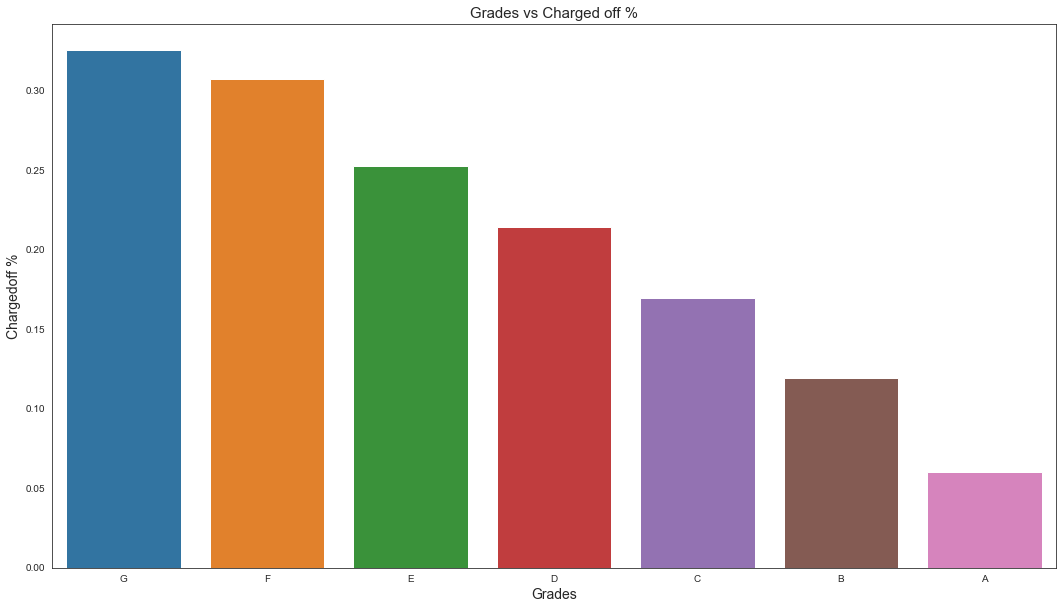

In [37]:
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.set_title('Grades vs Charged off %',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_%', data=grade_vs_loan_st)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff %',fontsize=14)
plt.show()

**Inference**
* Grade "A" is less likely to get charged off.
* Grades "F" and "G" hare highly likely to get charged off
* Likeliness of getting charged off is increases with grade moving from "A" towards "G"

### Multivariate Analysis

**Pupose of Loan across applicants**

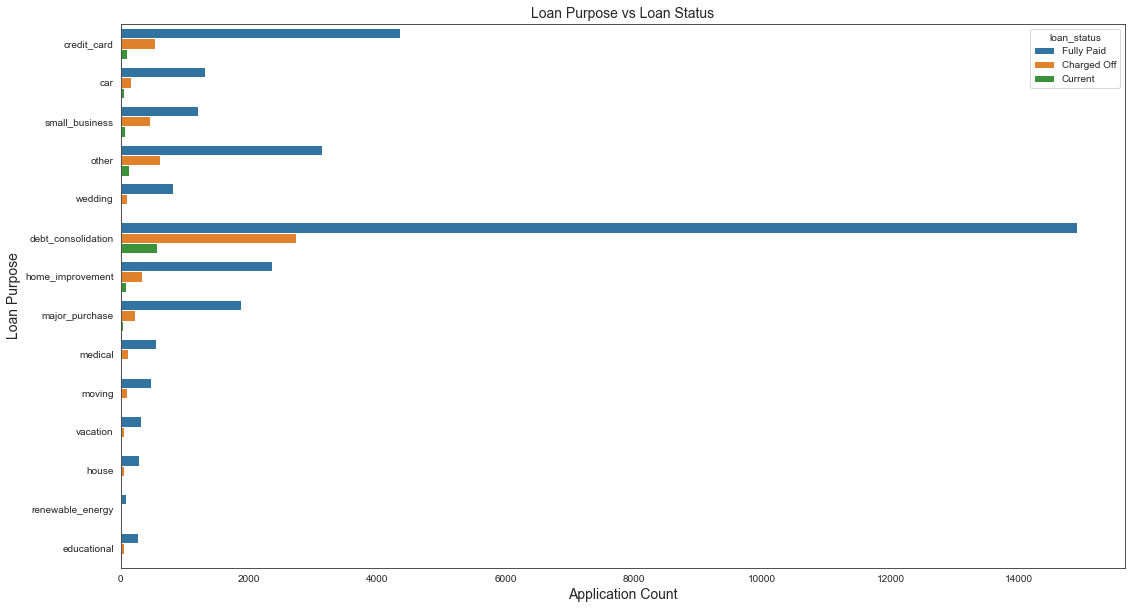

In [38]:
# Loan Purpose
plt.figure(figsize=(18,10))
sns.set_style("white")

ax = sns.countplot(y="purpose",data=data,hue='loan_status',palette='tab10')
ax.set_title('Loan Purpose vs Loan Status',fontsize=14)
ax.set_ylabel('Loan Purpose',fontsize=14)
ax.set_xlabel('Application Count',fontsize=14)      
plt.show()

**Inference**:
* Maximum number of loans were lended for the purpose of debt consolidation and for paying credit card bill
* Also number of chraged off count are high for these type of loans

**Employment Length**

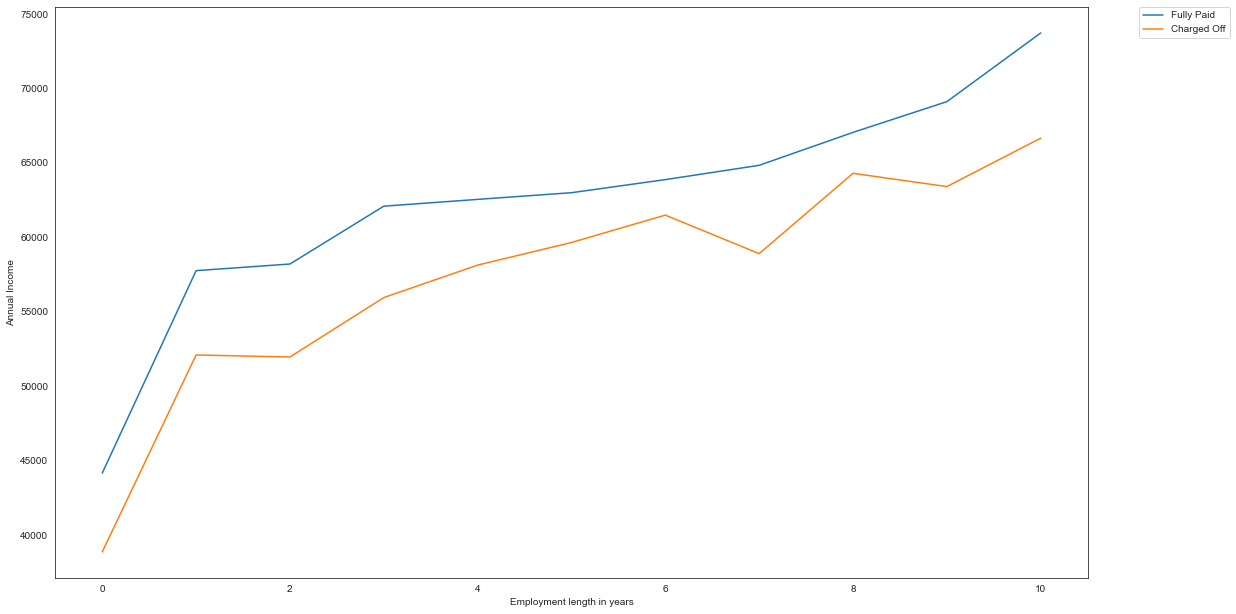

In [39]:
x = sns.lineplot(x='emp_length_n', y='annual_inc', data=data[data['loan_status']!='Current'].sort_values('emp_length_n',ascending=True), hue='loan_status', ci=None)
x.set_xlabel('Employment length in years')
x.set_ylabel('Annual Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
x.figure.set_size_inches(18.5, 10.5)
plt.show()

**Inference:**
* The applicants having higher income bracket for the corresponding employment period are less likely to default

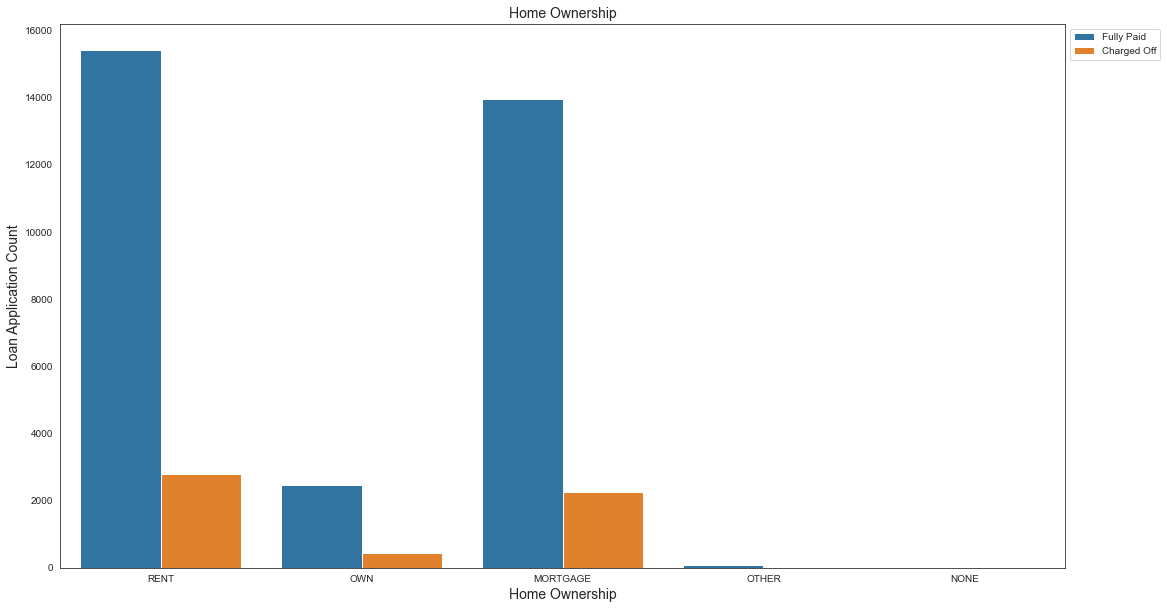

In [40]:
#UnOrdered Categorical Univariant Analysis on Home Ownership
plt.figure(figsize=(18,10))
sns.set_style("white")

ax = sns.countplot(x="home_ownership",data=data[data['loan_status']!='Current'],hue='loan_status',palette='tab10')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14)
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)      
plt.show()

**Inference**:
* Maximum number of applicants live in rented home or mortgazed
* Also number of chraged off count are high for these type of loans

# Conclusion

1. The applicants are more likely to default in the early stage of loan tenure, hence after a significant tenure of on-time payments applicants are less likely to default
2. Increase in annual income decreases the chances of charged off, hence its significantly safe to lend loans to applicants having higher incomes
3. It evident that average interest rate is highest for small business purpose which indicates that small business purpose loans with high interest make it hard for applicants to repay
4. Applicants working for less than 1 year of work experience have high chances of getting charged off, hence close to zero work experience applicants are a risk category
5. The applicants having higher income bracket for the same corresponding employment period are less likely to default
6. Likeliness of getting charged off is increases with grade moving from "A" towards "G"


> Authors:
> Balakumar Seethapathy
> & Roshan Choudhary

**Notebook ends Here**